# Emotion Prediction from RGB Data Using SVC

This Jupyter Notebook demonstrates how to predict emotions from RGB data using SVC 

## 1. Importing Libraries

In [142]:
import numpy as np
import pandas as pd

## 2. Load dataset 

In [143]:
# Load the dataset
data = pd.read_csv('real_data.csv')

# Strip leading and trailing spaces from all columns
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

data.head() 

,Emotion,RGB1_R,RGB1_G,RGB1_B,RGB2_R,RGB2_G,RGB2_B,RGB3_R,RGB3_G,RGB3_B
0,Bright,229,0,13,225,225,255,253,166,74
1,Festive,229,0,13,225,225,255,255,242,0
2,Lively,229,0,13,225,225,255,26,67,155
3,Hot,229,0,13,138,112,12,255,242,0
4,Vigorous,229,0,13,255,242,0,12,32,120


In [144]:
# Count the number of occurrences of each distinct emotion
emotion_counts = data['Emotion'].value_counts()

print("Counts of each emotion:")
print(emotion_counts)

Counts of each emotion:
Emotion
Untamed     15
Ethnic      14
Fresh       12
Urbane      12
Quiet       12
            ..
Lightl       1
Bitterl      1
Artistic     1
Plaiced      1
Happy        1
Name: count, Length: 198, dtype: int64


In [145]:
# Filter out only single-word emotions
single_word_emotions = data['Emotion'].str.split().apply(lambda x: len(x) == 1)

# Count the occurrences of each single-word emotion
emotion_counts = data[single_word_emotions]['Emotion'].value_counts()

print("Counts of each single-word emotion:")
print(emotion_counts)

# Calculate the total count of all single-word emotions
total_single_word_emotions = emotion_counts.sum()
print("\nTotal count of single-word emotions:", total_single_word_emotions)

Counts of each single-word emotion:
Emotion
Untamed      15
Ethnic       14
Quiet        12
Elaborate    12
Fresh        12
             ..
Lightl        1
Artistic      1
Plaiced       1
Bitterl       1
Happy         1
Name: count, Length: 181, dtype: int64

Total count of single-word emotions: 1014


In [146]:
# Extract distinct values from the 'Emotion' column
distinct_emotions = data['Emotion'].unique()

print("Distinct values in the 'Emotion' column:")
for emotion in distinct_emotions:
    print(emotion)

Distinct values in the 'Emotion' column:
Bright
Festive
Lively
Hot
Vigorous
Bold
Forceful
Dynamic
Dynamic and Active
Rich
Mature
Alluring
Untamed
Glossy
Fascinating
Abundant
Luxurious
Mellow
Sweet
Cheerful
Childlike
Joyful
Merry
Colourful
Brilliant
Pretty
Sunny
Generous
Sweet and Dreamy
Sweet - Sour
Cute
Feminine
Agreeable to the touch
Amiable
Innocent
Smooth
Gentle
Supple
Soft
Charming
Gentle and Elegant
Mild
Genteed
Pleasant
Tender
Domestic
Emotional
Casual
Graceful
Calm
Sedate
Nostalgic
Japanese
Elegant
Sleek
Delicious
Interesting
Diligent
Tasteful
Extravagant
Ethnic
Elaborate
Robust
Fruitful
Traditional
Substantial
Heavy and Deep
Old - Fashioned
Placid
Wild
Serious
Strong and Robust
Dazzling
Flamboyant
Tropical
Enjoyable
Aromatic
Friendly
Open
Lighthearted
Amusing
Healthy
Restful
Intimate
Free
Dreamy
Delicate
Dry
Natural
Wholesome
Provincial
Modest
Chic
Subtle and Mysterious
Aqueous
Simple Quiet and Elegant
Sober
Classic
Rustic
Practical
Grand
Pastoral
Sturdy
Conservative
Sound
Qui

##### Check that the problem is not Multi - label classification problem because each set of 3-rgb values are for specific one emotion and only

In [151]:
# Remove leading/trailing spaces from column names and values
data.columns = data.columns.str.strip()
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# Combine the three RGB sets into a single identifier
data['RGB_Identifier'] = data.apply(lambda row: (row['RGB1_R'], row['RGB1_G'], row['RGB1_B'],
                                                 row['RGB2_R'], row['RGB2_G'], row['RGB2_B'],
                                                 row['RGB3_R'], row['RGB3_G'], row['RGB3_B']), axis=1)

# Check for duplicates
duplicate_rgb = data.duplicated(subset=['RGB_Identifier'], keep=False)

# Display the rows with duplicate RGB sets
duplicates = data[duplicate_rgb].sort_values(by='RGB_Identifier')

# Check if any duplicates exist and print the result
if not duplicates.empty:
    print("Found emotions with the same RGB values:")
    print("Count of duplicates: ", len(duplicates))
    print(duplicates[['Emotion', 'RGB1_R', 'RGB1_G', 'RGB1_B', 'RGB2_R', 'RGB2_G', 'RGB2_B', 'RGB3_R', 'RGB3_G', 'RGB3_B']])
else:
    print("No duplicate RGB sets found across different emotions.")

Found emotions with the same RGB values:
Count of duplicates:  262
              Emotion  RGB1_R  RGB1_G  RGB1_B  RGB2_R  RGB2_G  RGB2_B  RGB3_R  \
1059         Youthful       4      36      65     222     222     222     116   
705      Intellectual       4      36      65     222     222     222     116   
101   Old - Fashioned      45       0       5     127     127     127     112   
96    Old - Fashioned      45       0       5     127     127     127     112   
395           Untamed      51      73      18     112      11       1      33   
...               ...     ...     ...     ...     ...     ...     ...     ...   
134          Domestic     253     192     145     234     124     104     208   
342           Healthy     253     192     145     254     230     194     173   
142             Sunny     253     192     145     254     230     194     173   
38           Innocent     253     217     205     255     255     255     192   
437          Charming     253     217     

C:\Users\DELL\AppData\Local\Temp\ipykernel_2408\2299083887.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [148]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

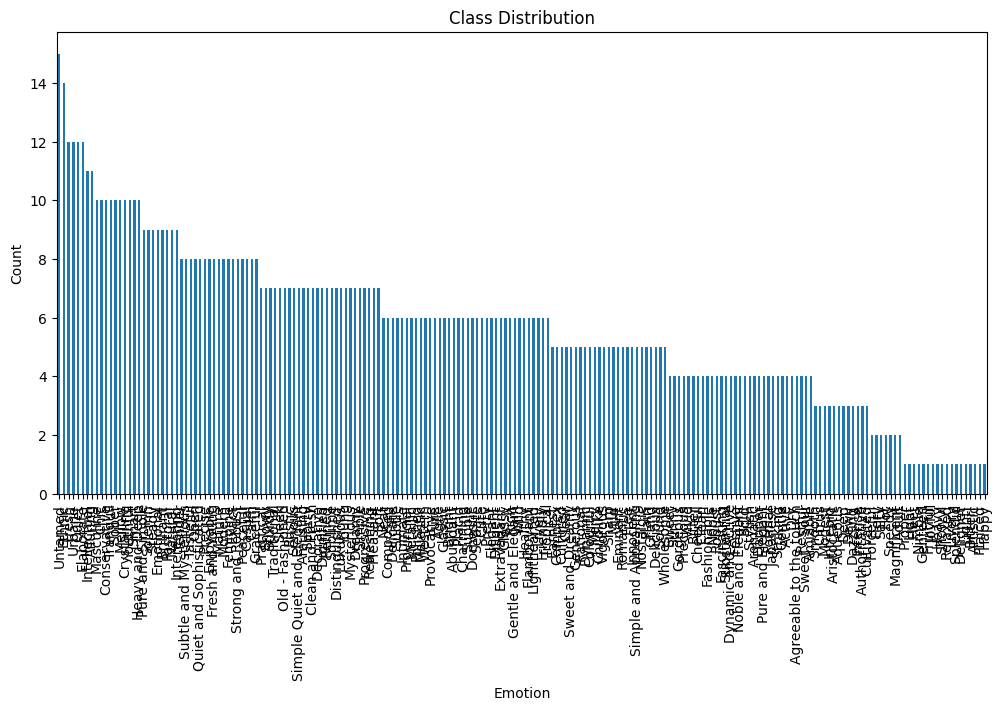

In [149]:
import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(12, 6))
data['Emotion'].value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


In [150]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE

# Load the dataset
df = pd.read_csv('real_data.csv')

# Encode the categorical labels
le = LabelEncoder()
df['Emotion'] = le.fit_transform(df['Emotion'])

# Feature Engineering: Aggregating RGB values
df['RGB1_sum'] = df['RGB1_R'] + df['RGB1_G'] + df['RGB1_B']
df['RGB2_sum'] = df['RGB2_R'] + df['RGB2_G'] + df['RGB2_B']
df['RGB3_sum'] = df['RGB3_R'] + df['RGB3_G'] + df['RGB3_B']

# Update feature set
X = df[['RGB1_sum', 'RGB2_sum', 'RGB3_sum']].values
y = df['Emotion'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the minimum class size in the training set
min_class_size = min(np.bincount(y_train))
print(f"Minimum class size: {min_class_size}")

# Handle class imbalance with SMOTE
smote = SMOTE(sampling_strategy='auto', k_neighbors=min(5, min_class_size-1), random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVC model with class weights
svc = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced')
svc.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = svc.predict(X_test)

# Print the evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf'],
    'class_weight': ['balanced']
}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)
grid.fit(X_train, y_train)

# Evaluate the best estimator
best_svc = grid.best_estimator_
y_pred_best = best_svc.predict(X_test)

print("Best Parameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Minimum class size: 0


InvalidParameterError: The 'k_neighbors' parameter of SMOTE must be an int in the range [1, inf) or an object implementing 'kneighbors' and 'kneighbors_graph'. Got -1 instead.